# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Bizzati Hanif Raushan Fikri
- **Email:** bizzhanif@gmail.com
- **ID Dicoding:** MC006D5Y1740

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca dan musim mempengaruhi pola penyewaan sepeda?
- Bagaimana tren penyewaaan sepeda berdasarkan hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [3]:
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

df_day.head(), df_hour.head()

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

**Insight:**
- Mengambil seluruh data yang ada pada day.csv dan hour.csv, lalu memastikan data yang diambil sudah sesuai dengan menampilkan 5 baris pertama dari masing-masing

### Assessing Data

In [4]:
# Cek missing values pada data
print(df_hour.isnull().sum())
print(f"\n\n{df_day.isnull().sum()}")

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [5]:
# Cek duplikasi data
print(f"\nJumlah duplikat pada day.csv: {df_day.duplicated().sum()}")
print(f"Jumlah duplikat pada hour.csv: {df_hour.duplicated().sum()}")


Jumlah duplikat pada day.csv: 0
Jumlah duplikat pada hour.csv: 0


In [6]:
# Cek tipe data
print(df_day.dtypes)
print(f"\n{df_hour.dtypes}")

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [7]:
# Cek outliers pada data
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Mencari outliers pada dataset hour.csv
outliers_hour_count = detect_outliers(df_hour, "cnt")
outliers_hour_weather = detect_outliers(df_hour, "weathersit")

# Mencari outliers pada dataset day.csv
outliers_day_count = detect_outliers(df_day, "cnt")
outliers_day_weather = detect_outliers(df_day, "weathersit")

print(f"Jumlah outlier pada pengguna per-jam: {outliers_hour_count.shape[0]}")
print(outliers_hour_count[['hr', 'cnt']].head())
print(f"\nJumlah outlier pada cuaca per-jam: {outliers_hour_weather.shape[0]}")
print(outliers_hour_weather[['hr', 'weathersit']].head())

print(f"\nJumlah outlier pada pengguna per-hari: {outliers_day_count.shape[0]}")
print(outliers_day_count[['dteday', 'cnt']].head())
print(f"\nJumlah outlier pada cuaca per-hari: {outliers_day_weather.shape[0]}")
print(outliers_day_weather[['dteday', 'weathersit']].head())

Jumlah outlier pada pengguna per-jam: 505
       hr  cnt
5536   14  651
10358  17  644
10359  18  712
10382  17  676
10383  18  734

Jumlah outlier pada cuaca per-jam: 3
      hr  weathersit
585   16           4
8854  18           4
9123   1           4

Jumlah outlier pada pengguna per-hari: 0
Empty DataFrame
Columns: [dteday, cnt]
Index: []

Jumlah outlier pada cuaca per-hari: 0
Empty DataFrame
Columns: [dteday, weathersit]
Index: []


**Insight:**
- Kedua data csv tidak memiliki missing value ataupun data duplikat.

- Tipe data pada kolom "dteday" (tanggal) masih bertipe 'objek' dan bukan tipe 'datetime'

- Terdapat outliers pada data utama yang akan digunakan yaitu count (jumlah penyewa) dan weathersit (kondisi cuaca) dari data hour.csv. Namun mengetahui sifat dari kedua data tersebut yang sangat bervariatif dalam keadaan nyatanya, outliers ini akan dipertahankan demi keaslian data.

- Terdapat beberapa fitur yang kurang relevan dengan pertanyaan bisnis


### Cleaning Data

In [8]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

# Mengecek kembali tipe data
print(df_day.dtypes["dteday"])
print(df_hour.dtypes["dteday"])


datetime64[ns]
datetime64[ns]


In [9]:
df_day = df_day.drop(['instant','yr','mnth','holiday','weekday','atemp',
                       'casual','registered'], axis='columns')
df_hour = df_hour.drop(['instant','yr','mnth','holiday','weekday','atemp',
                        'casual','registered'], axis='columns')

**Insight:**
- Mengubah tipe data "dteday" dari string ke datetime
- Menghapus beberapa fitur yang kurang relevan dengan pertanyaan bisnis

## Exploratory Data Analysis (EDA)

### Exploring rental count based on season and weather

In [10]:
# Analisis data penyewaan per musim
seasonal_rentals = (df_day.groupby("season").agg(
    Rental_Total=("cnt", "sum"),
    Rental_Average=("cnt", "mean"),
    Avg_Temperature=("temp", lambda x: x.mean() * 41), # normalisasi suhu selsius sesuai read.me
    Avg_Humidity=("hum", lambda x: x.mean() * 100), # normalisasi persentase kelembapan sesuai read.me
    Avg_Windspeed=("windspeed", lambda x: x.mean() * 67), # normalisasi km/h sesuai read.me
    ).reset_index()
)

season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

seasonal_rentals = seasonal_rentals.round(2)
seasonal_rentals["Season"] = seasonal_rentals["season"].map(season_mapping)
seasonal_rentals = seasonal_rentals[["Season", "Rental_Total", "Rental_Average",
                                     "Avg_Temperature", "Avg_Humidity", "Avg_Windspeed"]]
seasonal_rentals.columns = ["Season", "Rental Total", "Rental Avg",
                            "Avg Temperature °C", "Avg Humidity %", "Avg Windspeed Km/h"]

seasonal_rentals = seasonal_rentals.sort_values(by="Rental Total", ascending=False)

seasonal_rentals

,Season,Rental Total,Rental Avg,Avg Temperature °C,Avg Humidity %,Avg Windspeed Km/h
2,Fall,1061129,5644.30,28.96,63.35,11.53
1,Summer,918589,4992.33,22.32,62.69,13.63
3,Winter,841613,4728.16,17.34,66.87,11.52
0,Spring,471348,2604.13,12.21,58.29,14.37


In [11]:
# Rata-rata penyewaan berdasarkan kombinasi musim & cuaca
season_weather_rentals = (df_day.groupby(["season", "weathersit"])["cnt"]
                          .agg(["sum", "mean", "count"]).reset_index()
)

weather_mapping = {1: "Clear", 2: "Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"}

season_weather_rentals["Season"] = season_weather_rentals["season"].map(season_mapping)
season_weather_rentals["Weather"] = season_weather_rentals["weathersit"].map(weather_mapping)

season_weather_rentals = season_weather_rentals.round(2)
season_weather_rentals = season_weather_rentals[["Season", "Weather", "sum", "mean", "count"]]
season_weather_rentals.columns = ["Season", "Weather", "Total Rentals", "Avg Rentals", "Days Recorded"]

season_weather_rentals = season_weather_rentals.sort_values(by=["Season", "Total Rentals"], ascending=[True, False])

season_weather_rentals

,Season,Weather,Total Rentals,Avg Rentals,Days Recorded
6,Fall,Clear,799443,5878.26,136
7,Fall,Cloudy,250679,5222.48,48
8,Fall,Light Rain/Snow,11007,2751.75,4
0,Spring,Clear,312036,2811.14,111
1,Spring,Cloudy,155573,2357.17,66
2,Spring,Light Rain/Snow,3739,934.75,4
3,Summer,Clear,626986,5548.55,113
4,Summer,Cloudy,288096,4236.71,68
5,Summer,Light Rain/Snow,3507,1169.00,3
9,Winter,Clear,519487,5043.56,103


**Insight:**
- Jumlah penyewa per musim memiliki korelasi erat dengan suhu udara dan cuaca di hari tersebut

- Meskipun dalam pendataan perjam terdapat cuaca hujan sangat deras, dalam rata-rata per-harinya pada dataset (day.csv), kondisi tersebut mungkin kurang lama untuk digolongkan kondisi hujan deras. Penggolongan data tersebut sepenuhnya dari pembuat dataset dan demi keaslian data saya tidak akan mengolahnya lebih lanjut.

### Exploring workday and weekend rental usage hour comparison

In [12]:
# Menghitung jumlah hari kerja dan akhir pekan dalam dataset
total_workday = df_day[df_day["workingday"] == 1].shape[0]
total_weekend = df_day[df_day["workingday"] == 0].shape[0]

# Menghitung total penyewaan pada hari kerja dan akhir pekan
total_workday_rentals = df_day[df_day["workingday"] == 1]["cnt"].sum()
total_weekend_rentals = df_day[df_day["workingday"] == 0]["cnt"].sum()

# Menghitung rata-rata penyewaan per hari kerja dan per hari akhir pekan
mean_workday_rentals = total_workday_rentals / total_workday
mean_weekend_rentals = total_weekend_rentals / total_weekend

workday_analysis = pd.DataFrame({
    "Category": ["Workday", "Weekend"],
    "Total Days": [total_workday, total_weekend],
    "Total Rentals": [total_workday_rentals, total_weekend_rentals],
    "Average Rentals per Day": [mean_workday_rentals, mean_weekend_rentals]
})

workday_analysis

,Category,Total Days,Total Rentals,Average Rentals per Day
0,Workday,500,2292410,4584.820000
1,Weekend,231,1000269,4330.168831


In [13]:
# Mencari rata-rata jam penyewaan workday > weekend
hourly_comparison = df_hour.groupby(["hr", "workingday"])["cnt"].mean().unstack()

hourly_comparison.columns = ["Weekend Rental", "Workday Rental"]
hourly_comparison["Difference"] = hourly_comparison["Workday Rental"] - hourly_comparison["Weekend Rental"]
hourly_comparison = hourly_comparison.round(2)
hourly_comparison = hourly_comparison.sort_values(by="Difference", ascending=False)
hourly_comparison.index = hourly_comparison.index.map(lambda x: f"{x:02d}:00")

hourly_comparison.head(10)

,Weekend Rental,Workday Rental,Difference
hr,,,
08:00,105.65,477.01,371.35
07:00,43.41,290.61,247.21
18:00,281.06,492.23,211.17
17:00,323.55,525.29,201.74
19:00,231.67,348.40,116.73
06:00,18.74,102.50,83.76
20:00,174.74,249.72,74.98
09:00,171.62,241.52,69.89
21:00,142.06,186.29,44.23


In [14]:
# Mencari rata-rata jam penyewaan weekend > workday
hourly_comparison["Difference"] = hourly_comparison["Weekend Rental"] - hourly_comparison["Workday Rental"]
hourly_comparison = hourly_comparison.round(2)
hourly_comparison = hourly_comparison.sort_values(by="Difference", ascending=False)

hourly_comparison.head(10)

,Weekend Rental,Workday Rental,Difference
hr,,,
14:00,364.65,183.57,181.08
13:00,372.73,198.43,174.30
12:00,366.26,200.82,165.44
15:00,358.81,201.33,157.48
11:00,315.32,158.23,157.09
10:00,255.91,135.37,120.54
16:00,352.73,293.12,59.61
00:00,90.80,36.79,54.01
01:00,69.51,16.55,52.96


**Insight:**

- Rata-rata pengguna sepeda rental sedikit lebih banyak pada hari kerja
- Pada hari kerja, jumlah pengguna sepeda rental memuncak pada jam pagi (07:00 - 08:00) dan pada jam sore menuju malam (17:00 - 19:00)
- Pada hari libur, jumlah pengguna sepeda rental memuncak pada jam siang hingga sore (11:00 - 17:00)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cuaca dan musim mempengaruhi jumlah penyewaan sepeda?

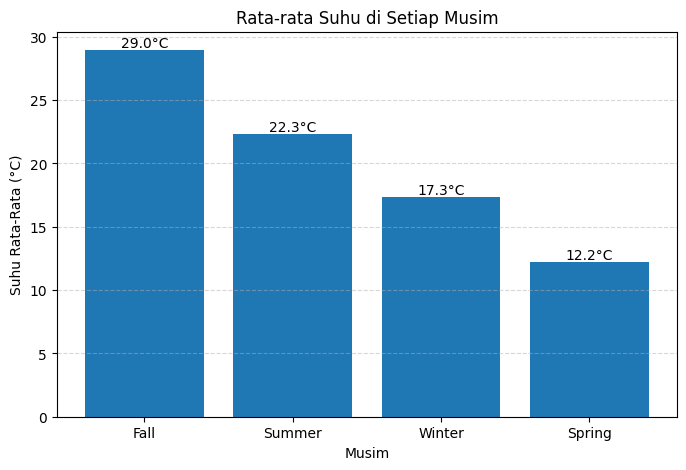

In [15]:
# Rata-rata suhu di setiap musim
plt.figure(figsize=(8, 5))

bars = plt.bar(
    seasonal_rentals["Season"],
    seasonal_rentals["Avg Temperature °C"]
)

# Menambahkan label suhu di atas batang
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.1f}°C",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.title("Rata-rata Suhu di Setiap Musim")
plt.xlabel("Musim")
plt.ylabel("Suhu Rata-Rata (°C)")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

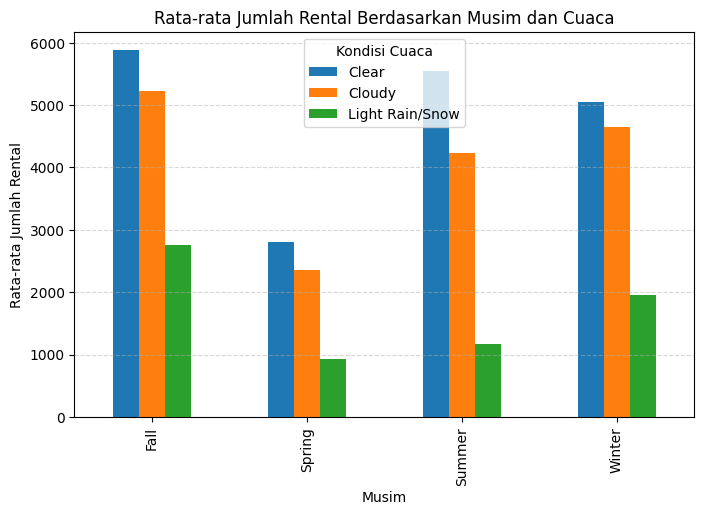

In [16]:
# Korelasi jumlah rental dengan musim dan cuaca
avg_rentals = df_day.groupby(["season", "weathersit"])["cnt"].mean().reset_index()

avg_rentals["season"] = avg_rentals["season"].map(season_mapping)
avg_rentals["weathersit"] = avg_rentals["weathersit"].map(weather_mapping)

pivot_table = avg_rentals.pivot(index="season", columns="weathersit", values="cnt")

pivot_table.plot(kind="bar", figsize=(8, 5))

plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Rental")
plt.title("Rata-rata Jumlah Rental Berdasarkan Musim dan Cuaca")
plt.legend(title="Kondisi Cuaca")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

**Insight:**
- Terdapat penurunan signifikan untuk jumlah pengguna ketika cuaca cenderung hujan pada hari tersebut, hal tersebut terjadi pada setiap musim.

- Penggunaan sepeda rental lebih banyak pada musim kemarau dan musim panas yang memiliki tingkat suhu lebih tinggi dibanding musim semi dan musim dingin.

### Pertanyaan 2: Bagaimana tren penyewaaan sepeda berdasarkan hari kerja dan hari libur?

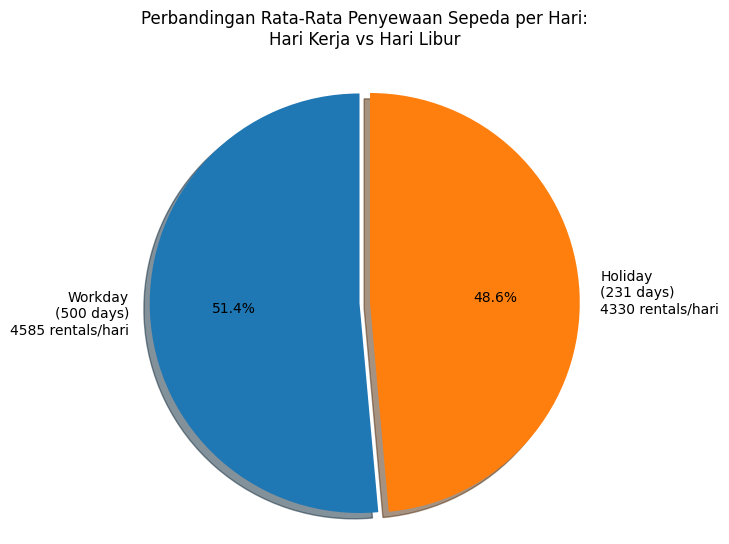

In [17]:
# Pie chart perbandingan rata-rata penyewaan pada hari work-day dan weekdend
categories = workday_analysis['Category']
avg_rentals = workday_analysis['Average Rentals per Day']
total_days = workday_analysis['Total Days']

labels = [
    f'Workday\n({total_days[0]} days)\n{avg_rentals[0]:.0f} rentals/hari',
    f'Holiday\n({total_days[1]} days)\n{avg_rentals[1]:.0f} rentals/hari'
]

colors = ['#1f77b4', '#ff7f0e']
explode = (0.05, 0)

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(
    avg_rentals,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 10}
)

plt.title('Perbandingan Rata-Rata Penyewaan Sepeda per Hari:\nHari Kerja vs Hari Libur', fontsize=12, pad=20)
plt.axis('equal')

plt.show()

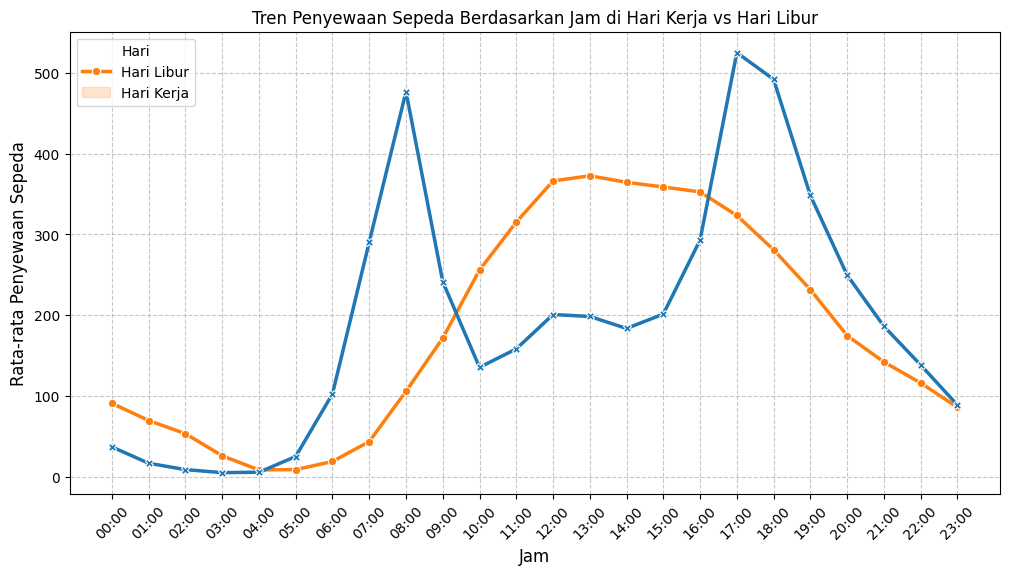

In [18]:
# Rata-rata penyewaan sepeda berdasarkan jam dan hari kerja
hourly_avg = df_hour.groupby(["hr", "workingday"])["cnt"].mean().reset_index()

# Visualisasi tren penyewaan sepeda berdasarkan jam dan hari kerja
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=hourly_avg,
    x="hr",
    y="cnt",
    hue="workingday",
    palette=["#ff7f0e", "#1f77b4"],
    style="workingday",
    markers=True,
    dashes=False,
    linewidth=2.5
)

# plotting
plt.title("Tren Penyewaan Sepeda Berdasarkan Jam di Hari Kerja vs Hari Libur")
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.xticks(range(24), [f"{h:02d}:00" for h in range(24)], rotation=45)
plt.grid(linestyle='--', alpha=0.7)

plt.legend(title="Hari", labels=["Hari Libur", "Hari Kerja"], loc="upper left")

plt.show()

**Insight:**
- Penggunaan sepeda rental pada hari kerja memiliki rata-rata 2.8% lebih tinggi dibandingkan pada hari libur.
- Pola penyewaan pada **hari kerja** menunjukkan dua puncak utama yaitu pada pagi hari (07:00 - 08:00) dan sore hari (17:00 - 18:00), hal ini mengindikasikan bahwa sepeda rental lebih banyak digunakan sebagai transportasi untuk perjalanan ke dan dari tempat kerja/sekolah.
- Pola penyewaan lebih stabil pada **hari libur** dengan peningkatan di siang hingga sore hari, hal ini menggambarkan penggunaan sepeda di hari libur yang lebih terkait dengan aktivitas cenderung santai.


## Analisis Lanjutan (Opsional)

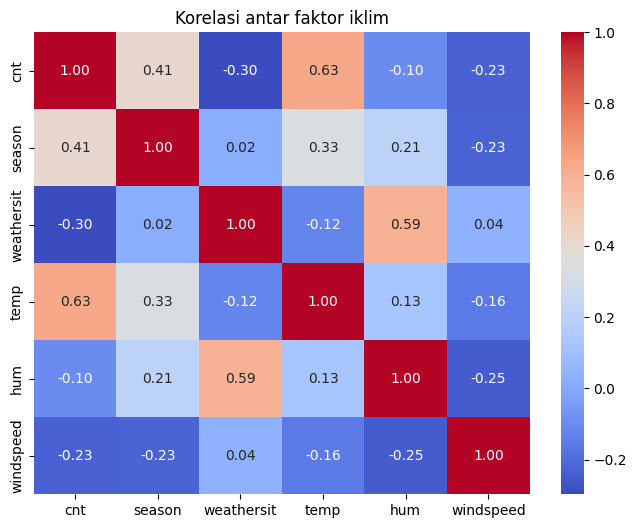

In [19]:

# Heatmap : Korelasi antar faktor iklim
plt.figure(figsize=(8, 6))
sns.heatmap(df_day[["cnt", "season", "weathersit", "temp", "hum", "windspeed"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar faktor iklim")
plt.show()


In [20]:
# Menentukan persentase hari kerja per musim
season_workday = df_day.groupby("season")["workingday"].mean().reset_index()

season_workday["workingday"] = (season_workday["workingday"] * 100).round(2)
season_workday["season"] = season_workday["season"].map(season_mapping)
season_workday.columns = ["Season", "Workday (%)"]
season_workday = season_workday.sort_values(by="Workday (%)", ascending=False)

season_workday

,Season,Workday (%)
2,Fall,69.68
1,Summer,69.57
3,Winter,67.98
0,Spring,66.30


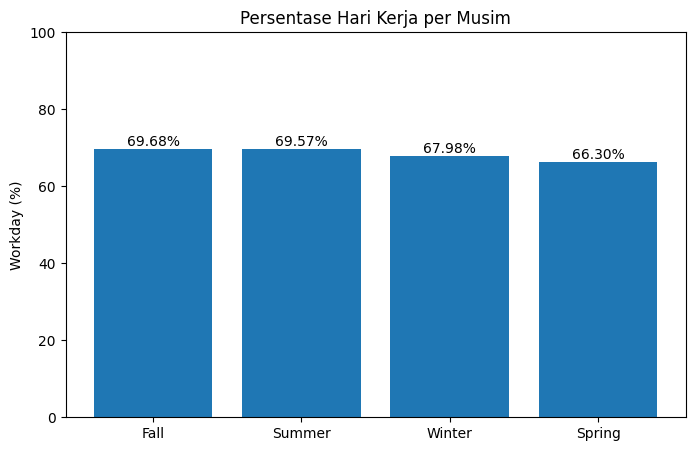

In [21]:
# Musim hari kerja
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(season_workday["Season"], season_workday["Workday (%)"])

ax.bar_label(bars, fmt="%.2f%%")

ax.set_title("Persentase Hari Kerja per Musim")
ax.set_ylabel("Workday (%)")
ax.set_ylim(0, 100)

plt.show()

**Insight:**
- Temperatur (temp) memiliki korelasi positif yang cukup tinggi dengan jumlah penyewaan sepeda (cnt), begitu pula temperatur dengan musim (season) serta musim dengan penyewaan sepeda hal ini membuktikan semakin hangat cuaca maka semakin banyak orang yang menyewa sepeda.

- Informasi mengenai persentase hari kerja tiap musim menggambarkan korelasi lebih antara banyaknya pengguna sepeda rental dengan musim-musim, dimana tampaknya lebih banyak pengguna rental di musim kerja dibandingkan musim libur

## Conclusion

**Kesimpulan 1: Pengaruh Cuaca dan Musim terhadap Pola Penyewaan Sepeda**

**Musim**
- Fall (Musim Gugur) mencatat total penyewaan 1,061,129 dengan rata-rata 5,644.3/hari.
- Summer (Musim Panas berada di posisi kedua dengan total 918,589 penyewaan dengan rata-rata 4,992.3/hari.
- Winter (Musim Dingin) dan Spring (Musim Semi) memiliki total penyewaan lebih rendah:
  - Winter 841,613 penyewaan, rata-rata 4,728.16/hari.
  - Spring: 471,348 penyewaan, rata-rata 2,604.13/hari.

- *Korelasi Suhu:* Suhu rata-rata tertinggi ada di Fall dengan suhu 28.96°C, berkebalikan dengan suhu terendah pada Spring dengan rata-rata suhu 12.2°C. Ini menunjukkan korelasi bahwa pengguna lebih memilih suhu hangat tetapi tidak ekstrem.

**Cuaca**
- Clear (Cerah) mendominasi penyewaan di semua musim, sebagai gambaran musim gugur mendapatkan rata-rata 5,878.26/hari

- Light Rain/Snow (Hujan Ringan/Salju Ringan) mengurangi penyewaan hingga ±50%.  
  - Contoh: pada musim gugur rata-rata penyewaan per hari turun dari 5,878.26/hari menjadi 2,751.75/hari, alias sebuah **penurunan hingga 53%**

- Heavy Rain/Snow (Hujan/Salju Lebat) sangat jarang terjadi pada data tetapi mengikuti pola perbandingan cuaca cerah dengan cuaca hujan ringan sebelumnya, dapat disimpulkan akan ada penurunan signifikan.
  - Hanya **3 hari hujan lebat tercatat di Summer**.

---
---

**Kesimpulan 2 : Tren Penyewaan Berdasarkan Hari Kerja dan Hari Libur**

**Perbandingan Total Penyewaan**
- Hari kerja: 2,292,410 penyewaan (rata-rata 4,584.8/hari).
- Hari libur: 1,000,269 penyewaan (rata-rata 4,330.17/hari).
- Perbedaan: Hari kerja memiliki rata-rata penyewaan 2.8% lebih tinggi dalam data yang tercatat.

**Pola Jam**
- Hari Kerja:  
  - Puncak pada pagi (07:00–08:00) dan sore (17:00–18:00).
  - Contoh: rata-rata 477 penyewaan/hari di hari kerja vs 105 penyewaan/hari di hari libur pada pukul 08:00 di seluruh musim selama data 2 tahun

- Hari Libur:  
  - Puncak pada siang (10:00–16:00).
  - Contoh: rata-rata 183.57 penyewaan/hari di hari kerja vs 364.65 penyewaan/hari di hari libur pada pukul 14:00 di seluruh musim selama data 2 tahun

**Interpretasi**
- Penyewaan di hari kerja didominasi oleh komuter (pergi/pulang kerja).
- Hari libur lebih banyak digunakan untuk aktivitas rekreasi pada siang hari.

---
---

Kesimpulan 3: Rekomendasi untuk Peningkatan Sistem Penyewaan

**Optimalkan Ketersediaan Sepeda**
  - Pada hari kerja, tambahkan stok sepeda di area perkantoran/stasiun pada jam 07:00–08:00 dan 17:00–18:00.  
  - Fokuskan distribusi sepeda di area wisata pada jam 10:00–16:00.  

**Strategi Cuaca dan Musim**
  - Tingkatkan promosi dan diskon untuk memanfaatkan periode musim puncak (musim gugur dan panas).
  - Sediakan insentif (tarif lebih murah) untuk menjaga minat penyewa saat hujan/salju.
  - Berikan fasilitas tambahan (contoh; jas hujan gratis) pada hari hujan untuk meningkatkan kepuasan pelanggan.

In [22]:
df_day.to_csv("main_day.csv", index=False)
df_hour.to_csv("main_hour.csv", index=False)